<a href="https://colab.research.google.com/github/yanliu1111/pytorch-deep-learning/blob/main/04_pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#04. PyTorch Custom Datasets Video Notebook
*How do you get your own data into PyTorch? One of the ways to do so is via: custom datasets.*
## Domain libraries
Depending on what you're working on, vision, text, audio, recommendation, you'll want to look into each of the PyTorch domain libraries for existing data loading functions and customizable data loading functions.
0. Importing PyTorch and setting up device-agnostic code



In [1]:
import torch
from torch import nn

# Note: PyTorch 1.10.0+ is required for this course
torch.__version__

# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

1. Get data

In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and suhsi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, suhsi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)


data/pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak and sushi data...


2. Becoming one with the data (data preparation and data exploration)
>**“If I had 8 hours to build a machine learning model, I'd spend the first 6 hours preparing my dataset.” -- Abraham Lossfunction**

In [3]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [4]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


In [5]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

2.1 Visualizing and image
Let's write some code to:

- Get all of the image paths
- Pick a random image path using Python's random.choice()
- Get the image class name using pathlib.Path.parent.stem
- Since we're working with images, let's open the image with Python's PIL (python image library)
- We'll then show the image and print metadata

In [6]:
image_path

PosixPath('data/pizza_steak_sushi')

Random image path: data/pizza_steak_sushi/test/sushi/479711.jpg
Image class: sushi
Image height: 512
Image width: 512


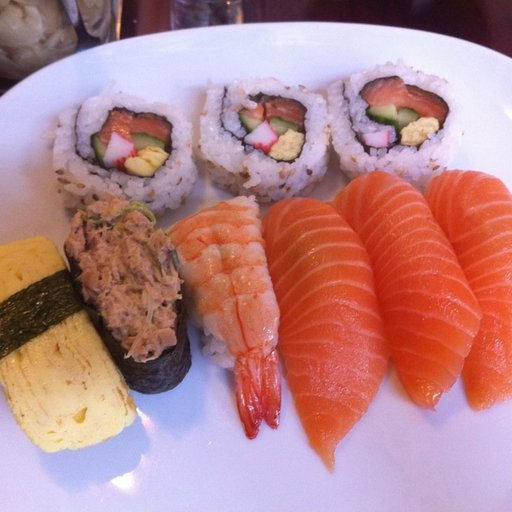

In [7]:
import random
from PIL import Image

# Set seed
# random.seed(42) --  if you want to keep same image, then use seed42

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
# image_path_list

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

use matplotlib, instead of PIL

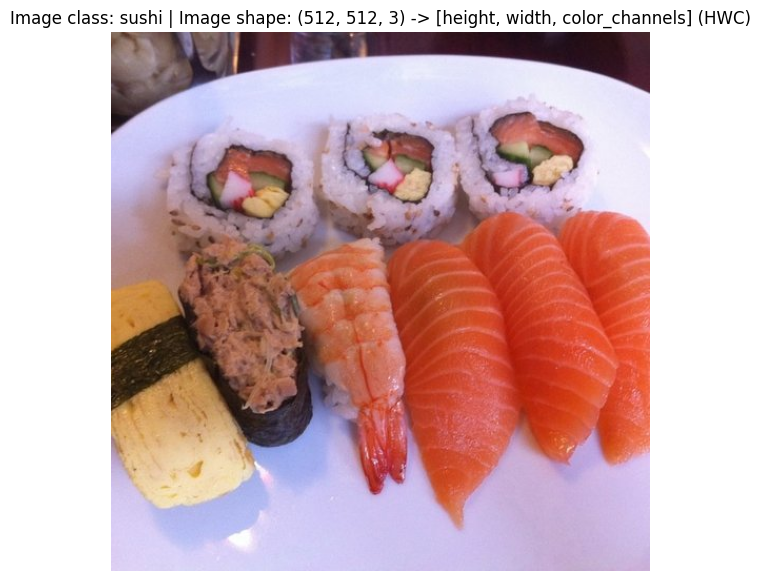

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False);

array([[[133, 111,  97],
        [134, 112,  98],
        [134, 112,  98],
        ...,
        [ 69,  40,  44],
        [ 70,  41,  45],
        [ 71,  42,  46]],

       [[130, 107,  93],
        [131, 109,  95],
        [132, 110,  96],
        ...,
        [ 69,  40,  44],
        [ 70,  41,  45],
        [ 70,  41,  45]],

       [[128, 102,  87],
        [128, 105,  89],
        [131, 108,  92],
        ...,
        [ 70,  39,  44],
        [ 70,  39,  44],
        [ 71,  40,  45]],

       ...,

       [[220, 206, 242],
        [221, 207, 243],
        [221, 207, 243],
        ...,
        [200, 174, 213],
        [200, 174, 213],
        [201, 175, 214]],

       [[219, 205, 240],
        [221, 207, 242],
        [222, 208, 243],
        ...,
        [201, 175, 214],
        [201, 175, 214],
        [201, 175, 214]],

       [[221, 207, 242],
        [223, 209, 244],
        [225, 211, 246],
        ...,
        [203, 177, 216],
        [203, 177, 216],
        [203, 177, 216]]], dtype=uint8)
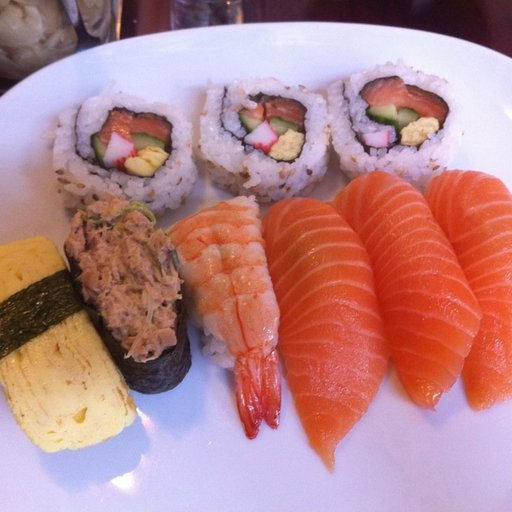

In [9]:
img_as_array

3. Transforming data
- Turn your target data into tensors (in our case, numerical representation of our images).
- Turn it into a torch.utils.data.Dataset and subsequently a torch.utils.data.DataLoader, we'll call these Dataset and DataLoader.-

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

3.1 Transforming data with torchvision.transforms
Transforms help you get your images ready to be used with a model/perform data augmentation - https://pytorch.org/vision/stable/transforms.html


In [11]:
# Write a transform for image
data_transform = transforms.Compose([
  # Resize our images to 64x64
  transforms.Resize(size=(64, 64)),
  # Flip the images randomly on the horizontal
  transforms.RandomHorizontalFlip(p=0.5),
  # Turn the image into a torch.Tensor
  transforms.ToTensor()
])

In [12]:
data_transform(img).shape

torch.Size([3, 64, 64])

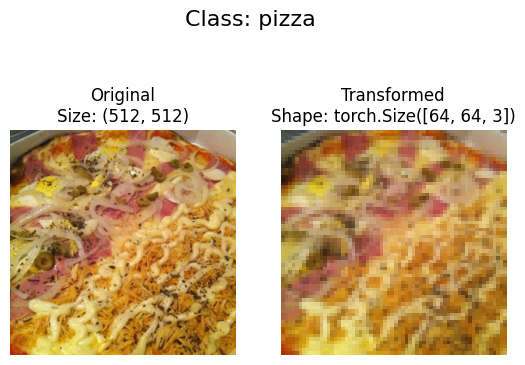

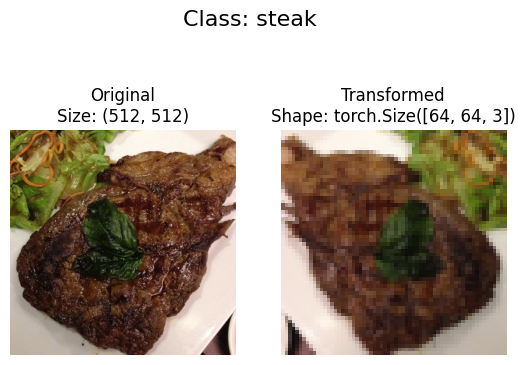

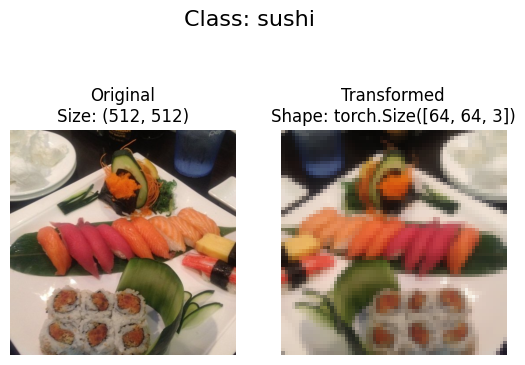

In [13]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)